In [1]:
import numpy as np
import pandas as pd

In [2]:
Z = np.load("nj-v3.npy")

In [3]:
Z

array([[4.43800000e+03, 4.44300000e+03, 7.14285714e-02, 2.00000000e+00],
       [4.43700000e+03, 4.44200000e+03, 7.14285714e-02, 2.00000000e+00],
       [4.42300000e+03, 4.43900000e+03, 7.69230769e-02, 2.00000000e+00],
       ...,
       [8.88200000e+03, 8.88700000e+03, 1.00000000e+00, 8.34000000e+02],
       [8.88500000e+03, 8.88800000e+03, 1.00000000e+00, 1.44200000e+03],
       [8.88600000e+03, 8.88900000e+03, 1.00000000e+00, 4.44600000e+03]])

In [4]:
Z.shape

(4445, 4)

In [14]:
from scipy.spatial.distance import squareform
from scipy.cluster.hierarchy import linkage, dendrogram
import matplotlib.pyplot as plt

# Function to perform neighbor-joining
def neighbor_joining(df):
    # Convert the DataFrame to a numpy matrix
    dist_matrix = df.to_numpy()
    taxa = list(df.index)

    while len(taxa) > 2:
        n = len(taxa)
        print(n)
        Q_matrix = np.zeros((n, n))
        
        # Compute the Q matrix
        sumi = [np.sum(dist_matrix[i]) for i in range(n)]
        
        for i in range(n):
            for j in range(n):
                if i != j:
                    Q_matrix[i][j] = (n - 2) * dist_matrix[i][j] - sumi[i] - sumi[j]
        print(Q_matrix)
        
        # Find the pair with the smallest Q value
        min_i, min_j = np.unravel_index(np.argmin(Q_matrix), Q_matrix.shape)
        
        # Compute the distance to the new node
        new_dist = (dist_matrix[min_i][min_j] + 
                    (sumi[min_i] - sumi[min_j]) / (n - 2)) / 2
        
        # Update the distance matrix
        new_row = [(dist_matrix[min_i][k] + dist_matrix[min_j][k] - dist_matrix[min_i][min_j]) / 2 for k in range(n) if k != min_i and k != min_j]
        new_dist_matrix = np.delete(dist_matrix, [min_i, min_j], axis=0)
        new_dist_matrix = np.delete(new_dist_matrix, [min_i, min_j], axis=1)
        new_dist_matrix = np.vstack((new_dist_matrix, new_row))
        new_row.append(0)
        new_dist_matrix = np.column_stack((new_dist_matrix, new_row))
        
        # Update the taxa list
        new_taxa = taxa[:]
        new_taxa.remove(taxa[min_i])
        new_taxa.remove(taxa[min_j])
        new_taxa.append(taxa[min_i] + taxa[min_j])
        
        # Update the distance matrix and taxa list
        dist_matrix = new_dist_matrix
        taxa = new_taxa
        
        print(dist_matrix)
        print(taxa)
    # Create the final linkage matrix for dendrogram plotting
    Z = linkage(squareform(df.to_numpy()), method='average')
    return Z

In [15]:
dm = np.array([[0,5,9,9,8],
               [5,0,10,10,9],
               [9,10,0,8,7],
               [9,10,8,0,3],
               [8,9,7,3,0]])
name = ['a','b','c','d','e']

df = pd.DataFrame(data = dm, index=name, columns=name)
Z = neighbor_joining(df)

5
[[  0. -50. -38. -34. -34.]
 [-50.   0. -38. -34. -34.]
 [-38. -38.   0. -40. -40.]
 [-34. -34. -40.   0. -48.]
 [-34. -34. -40. -48.   0.]]
[[0. 8. 7. 7.]
 [8. 0. 3. 7.]
 [7. 3. 0. 6.]
 [7. 7. 6. 0.]]
['c', 'd', 'e', 'ab']
4
[[  0. -24. -24. -28.]
 [-24.   0. -28. -24.]
 [-24. -28.   0. -24.]
 [-28. -24. -24.   0.]]
[[0. 3. 4.]
 [3. 0. 3.]
 [4. 3. 0.]]
['d', 'e', 'cab']
3
[[  0. -10. -10.]
 [-10.   0. -10.]
 [-10. -10.   0.]]
[[0. 2.]
 [2. 0.]]
['cab', 'de']


{'icoord': [[5.0, 5.0, 15.0, 15.0],
  [35.0, 35.0, 45.0, 45.0],
  [25.0, 25.0, 40.0, 40.0],
  [10.0, 10.0, 32.5, 32.5]],
 'dcoord': [[0.0, 5.0, 5.0, 0.0],
  [0.0, 3.0, 3.0, 0.0],
  [0.0, 7.5, 7.5, 3.0],
  [5.0, 9.166666666666666, 9.166666666666666, 7.5]],
 'ivl': ['a', 'b', 'c', 'd', 'e'],
 'leaves': [0, 1, 2, 3, 4],
 'color_list': ['C1', 'C2', 'C0', 'C0'],
 'leaves_color_list': ['C1', 'C1', 'C0', 'C2', 'C2']}

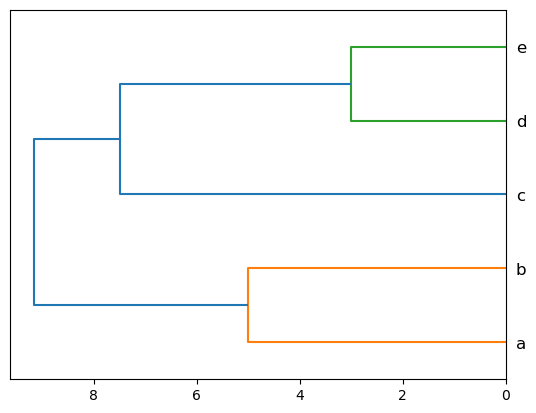

In [16]:
Z = linkage(squareform(df.to_numpy()), method='average')
dendrogram(Z, labels=df.index, orientation='left')

In [2]:
def neighbor_joining(df):
    # Convert the DataFrame to a numpy matrix
    dist_matrix = df.to_numpy()
    taxa = list(df.index)
    tree = {}

    while len(taxa) > 2:
        n = len(taxa)
        Q_matrix = np.zeros((n, n))
        
        # Compute the Q matrix
        sumi = [np.sum(dist_matrix[i]) for i in range(n)]
        
        for i in range(n):
            for j in range(n):
                if i != j:
                    Q_matrix[i][j] = (n - 2) * dist_matrix[i][j] - sumi[i] - sumi[j]
        
        # Find the pair with the smallest Q value
        min_i, min_j = np.unravel_index(np.argmin(Q_matrix), Q_matrix.shape)
        
        # Compute the distance to the new node
        new_dist = (dist_matrix[min_i][min_j] +  (sumi[min_i] - sumi[min_j]) / (n - 2)) / 2
        
        # Update the tree
        new_node = taxa[min_i] + taxa[min_j]
        tree[new_node] = {taxa[min_i]: new_dist,
                          taxa[min_j]: dist_matrix[min_i][min_j] - new_dist}
        
        print(tree)
        # Update the distance matrix
        new_row = [(dist_matrix[min_i][k] + dist_matrix[min_j][k] - dist_matrix[min_i][min_j]) / 2 for k in range(n) if k != min_i and k != min_j]
        new_dist_matrix = np.delete(dist_matrix, [min_i, min_j], axis=0)
        new_dist_matrix = np.delete(new_dist_matrix, [min_i, min_j], axis=1)
        new_dist_matrix = np.vstack((new_dist_matrix, new_row))
        new_row.append(0)
        new_dist_matrix = np.column_stack((new_dist_matrix, new_row))
        
        # Update the taxa list
        new_taxa = taxa[:]
        new_taxa.remove(taxa[min_i])
        new_taxa.remove(taxa[min_j])
        new_taxa.append(new_node)
        
        # Update the distance matrix and taxa list
        dist_matrix = new_dist_matrix
        taxa = new_taxa
        
    # Add the final two nodes to the tree
    #tree[taxa[0]] = {taxa[1]: dist_matrix[0, 1]}
    tree[taxa[1]][taxa[0]] = dist_matrix[0, 1]
    
    return tree

# Example usage
import pandas as pd

# Define the distance matrix as a DataFrame
dm = np.array([[0, 5, 9, 9, 8],
               [5, 0, 10, 10, 9],
               [9, 10, 0, 8, 7],
               [9, 10, 8, 0, 3],
               [8, 9, 7, 3, 0]])
df = pd.DataFrame(dm, index=['A', 'B', 'C', 'D', 'E'], columns=['A', 'B', 'C', 'D', 'E'])

# Run the neighbor joining algorithm
result_tree = neighbor_joining(df)
print(result_tree)


{'AB': {'A': 2.0, 'B': 3.0}}
{'AB': {'A': 2.0, 'B': 3.0}, 'CAB': {'C': 4.0, 'AB': 3.0}}
{'AB': {'A': 2.0, 'B': 3.0}, 'CAB': {'C': 4.0, 'AB': 3.0}, 'DE': {'D': 2.0, 'E': 1.0}}
{'AB': {'A': 2.0, 'B': 3.0}, 'CAB': {'C': 4.0, 'AB': 3.0}, 'DE': {'D': 2.0, 'E': 1.0, 'CAB': 2.0}}


In [20]:
species = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H']
distances = np.array([
    [0, 5, 9, 9, 8, 7, 10, 11],
    [5, 0, 10, 10, 9, 8, 11, 12],
    [9, 10, 0, 8, 7, 13, 14, 15],
    [9, 10, 8, 0, 3, 13, 14, 15],
    [8, 9, 7, 3, 0, 12, 13, 14],
    [7, 8, 13, 13, 12, 0, 5, 6],
    [10, 11, 14, 14, 13, 5, 0, 5],
    [11, 12, 15, 15, 14, 6, 5, 0]
])

df = pd.DataFrame(distances, index=species, columns=species)

# Run the neighbor joining algorithm
result_tree = neighbor_joining(df)
print(result_tree)

{'DE': {'D': 2.0, 'E': 1.0}}
{'DE': {'D': 2.0, 'E': 1.0}, 'CDE': {'C': 4.0, 'DE': 2.0}}
{'DE': {'D': 2.0, 'E': 1.0}, 'CDE': {'C': 4.0, 'DE': 2.0}, 'GH': {'G': 2.0, 'H': 3.0}}
{'DE': {'D': 2.0, 'E': 1.0}, 'CDE': {'C': 4.0, 'DE': 2.0}, 'GH': {'G': 2.0, 'H': 3.0}, 'FGH': {'F': 1.3333333333333333, 'GH': 1.6666666666666667}}
{'DE': {'D': 2.0, 'E': 1.0}, 'CDE': {'C': 4.0, 'DE': 2.0}, 'GH': {'G': 2.0, 'H': 3.0}, 'FGH': {'F': 1.3333333333333333, 'GH': 1.6666666666666667}, 'AB': {'A': 2.0, 'B': 3.0}}
{'DE': {'D': 2.0, 'E': 1.0}, 'CDE': {'C': 4.0, 'DE': 2.0}, 'GH': {'G': 2.0, 'H': 3.0}, 'FGH': {'F': 1.3333333333333333, 'GH': 1.6666666666666667}, 'AB': {'A': 2.0, 'B': 3.0}, 'CDEFGH': {'CDE': 3.0, 'FGH': 4.0}}
{'DE': {'D': 2.0, 'E': 1.0}, 'CDE': {'C': 4.0, 'DE': 2.0}, 'GH': {'G': 2.0, 'H': 3.0}, 'FGH': {'F': 1.3333333333333333, 'GH': 1.6666666666666667}, 'AB': {'A': 2.0, 'B': 3.0}, 'CDEFGH': {'CDE': 3.0, 'FGH': 4.0, 'AB': 0.0}}


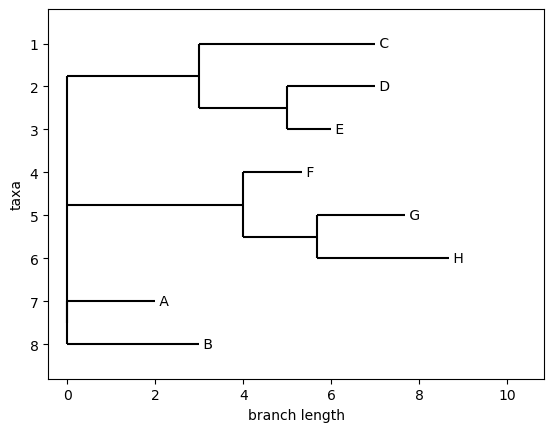

Tree saved to tree.xml


In [24]:
from Bio import Phylo
from Bio.Phylo import PhyloXML
from Bio.Phylo.Newick import Tree, Clade

# Define the tree
tree_dict = result_tree

def build_clade(node, tree_dict):
    if node not in tree_dict:
        return Clade(name=node)
    
    clade = Clade()
    for child, distance in tree_dict[node].items():
        child_clade = build_clade(child, tree_dict)
        child_clade.branch_length = distance
        clade.clades.append(child_clade)
    
    return clade

# Create the root clade starting from 'DE'
root_clade = build_clade('CDEFGH', tree_dict)

# Create a Tree object
tree = Tree(root=root_clade)

# Convert to PhyloXML
phyloxml_tree = PhyloXML.Phylogeny.from_tree(tree)

# Save the tree to a PhyloXML file
Phylo.write([phyloxml_tree], 'tree.xml', 'phyloxml')
Phylo.draw(tree)
print('Tree saved to tree.xml')


In [17]:
from Bio import Phylo
from Bio.Phylo import PhyloXML
from Bio.Phylo.Newick import Tree, Clade

# Define the tree
tree_dict = {
    'AB': {'A': 2.0, 'B': 3.0},
    'CAB': {'AB': 3.0, 'C': 4.0},
    'DE': {'D': 2.0,  'CAB': 2.0, 'E': 1.0}
}

def build_clade(node, tree_dict):
    if node not in tree_dict:
        return Clade(name=node)
    
    clade = Clade()
    for child, distance in tree_dict[node].items():
        child_clade = build_clade(child, tree_dict)
        child_clade.branch_length = distance
        clade.clades.append(child_clade)
    
    return clade

# Create the root clade starting from 'DE'
root_clade = build_clade('DE', tree_dict)

# Create a Tree object
tree = Tree(root=root_clade)

# Convert to PhyloXML
phyloxml_tree = PhyloXML.Phylogeny.from_tree(tree)

# Save the tree to a PhyloXML file
Phylo.write([phyloxml_tree], 'tree.xml', 'phyloxml')

print('Tree saved to tree.xml')


Tree saved to tree.xml


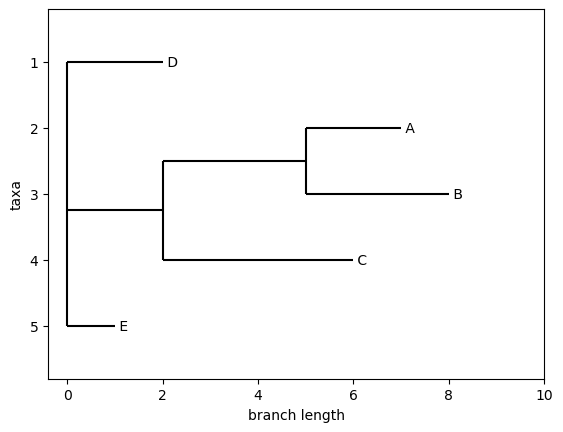

In [18]:
Phylo.draw(tree)

In [10]:
np.save('test_save_dic.npy',tree_dict)

In [11]:
read_dictionary = np.load('test_save_dic.npy',allow_pickle='TRUE').item()

In [12]:
read_dictionary

{'AB': {'A': 2.0, 'B': 3.0},
 'CAB': {'C': 4.0, 'AB': 3.0},
 'DE': {'D': 2.0, 'E': 1.0, 'CAB': 2.0}}